# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2021
- Instructor: Davis Buenger
- Section: Tuesday/Thursday 5:30PM
- Student Name: Xuecheng Liu
- Student Email: liu.6765@osu.edu
- Student ID: 123456789

Template Version V1.
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

The project is designed to perform clusteirng. We are offered 3 two-dimensional datasets with datapoints and their corresponding true clustering. We need to understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of the dataset and understand how to construct and evaluate a clustering algorithm to achieve good performance.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read datasets
small_df=pd.read_csv(r'small_Xydf.csv').drop(['Unnamed: 0'], axis=1)
large_df_1=pd.read_csv(r'large1_Xydf.csv').drop(['Unnamed: 0'], axis=1)
large_df_2=pd.read_csv(r'large2_Xydf.csv').drop(['Unnamed: 0'], axis=1)
small_df.head()

,X0,X1,y
0,0.071255,-0.196588,0
1,-8.305391,-5.672380,1
2,-12.885940,-4.962280,1
3,-9.537523,-2.429326,1
4,-2.008231,-8.650498,2


***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [2]:
# I will write them WSS, BSS and SSE as functions for further use
# For Small Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<small_df.shape[0]:
    if(small_df['y'][i]==0):
        cluster_0.append([small_df['X0'][i],small_df['X1'][i]])
    elif(small_df['y'][i]==1):
        cluster_1.append([small_df['X0'][i],small_df['X1'][i]])
    elif(small_df['y'][i]==2):
        cluster_2.append([small_df['X0'][i],small_df['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('TRUE WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('TRUE BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('TRUE SSE: ',SSE)

TRUE WSS:  625.1315700468002
TRUE BSS:  3986.441329795858
TRUE SSE:  4611.572899842658


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

In [3]:
from sklearn.cluster import KMeans
from time import process_time

KMeans(n_clusters=2/3/4, n_init=15,random_state=0)

n_cluster: The number of clusters to form as well as the number of centroids to generate. I choose 2/3/4 as the problem requirement. 

n_initial: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I choose 15 to make sure optimal result can be got.

random_state=0: Making the labels unchanged for each run.

In [4]:
X_2=small_df.iloc[:,0:2]
start=process_time()
k_means_2 = KMeans(n_clusters=2, n_init=15,random_state=0).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(k_means_2.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
small_df_2=pd.merge(X_2, temp_df, on=['X1'])
display(small_df_2)

# calculate WSS, BSS and SSE
cluster_0=[]
cluster_1=[]

# store the points
i=0
while i<small_df_2.shape[0]:
    if(small_df_2['y'][i]==0):
        cluster_0.append([small_df_2['X0'][i],small_df_2['X1'][i]])
    elif(small_df_2['y'][i]==1):
        cluster_1.append([small_df_2['X0'][i],small_df_2['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1


print('WSS K=2: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square


temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)
print('BSS K=2: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=2: ',SSE)
print('Running Time K=2: ',stop-start)

,X0,X1,y
0,0.071255,-0.196588,0
1,-8.305391,-5.672380,1
2,-12.885940,-4.962280,1
3,-9.537523,-2.429326,1
4,-2.008231,-8.650498,1
...,...,...,...
95,-4.987233,-3.779269,1
96,-7.030063,-10.397266,1
97,-1.088385,6.176772,0
98,-5.442979,-6.064344,1


WSS K=2:  1212.5883972546312
BSS K=2:  3398.984502588026
SSE K=2:  4611.572899842657
Running Time K=2:  0.02863924399999984


In [5]:
X_3=small_df.iloc[:,0:2]
start=process_time()
k_means_3 = KMeans(n_clusters=3, n_init=15,random_state=0).fit(X_3)
stop=process_time()
temp_df=pd.DataFrame(k_means_3.labels_,columns=['y'])
temp_df['X1']=X_3.iloc[:,1]
small_df_3=pd.merge(X_3, temp_df, on=['X1'])
display(small_df_3)

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<small_df.shape[0]:
    if(small_df_3['y'][i]==0):
        cluster_0.append([small_df_3['X0'][i],small_df_3['X1'][i]])
    elif(small_df_3['y'][i]==1):
        cluster_1.append([small_df_3['X0'][i],small_df_3['X1'][i]])
    elif(small_df_3['y'][i]==2):
        cluster_2.append([small_df_3['X0'][i],small_df_3['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS K=3: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS K=3: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=3: ',SSE)
print('Running Time K=3: ',stop-start)

,X0,X1,y
0,0.071255,-0.196588,1
1,-8.305391,-5.672380,2
2,-12.885940,-4.962280,2
3,-9.537523,-2.429326,2
4,-2.008231,-8.650498,0
...,...,...,...
95,-4.987233,-3.779269,0
96,-7.030063,-10.397266,0
97,-1.088385,6.176772,1
98,-5.442979,-6.064344,0


WSS K=3:  616.503778514241
BSS K=3:  3995.069121328418
SSE K=3:  4611.572899842659
Running Time K=3:  0.0460238340000001


In [6]:
X_4=small_df.iloc[:,0:2]
start=process_time()
k_means_4 = KMeans(n_clusters=4, n_init=15,random_state=0).fit(X_4)
stop=process_time()
temp_df=pd.DataFrame(k_means_4.labels_,columns=['y'])
temp_df['X1']=X_4.iloc[:,1]
small_df_4=pd.merge(X_4, temp_df, on=['X1'])
display(small_df_4)

cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]

# store the points
i=0
while i<small_df.shape[0]:
    if(small_df_4['y'][i]==0):
        cluster_0.append([small_df_4['X0'][i],small_df_4['X1'][i]])
    elif(small_df_4['y'][i]==1):
        cluster_1.append([small_df_4['X0'][i],small_df_4['X1'][i]])
    elif(small_df_4['y'][i]==2):
        cluster_2.append([small_df_4['X0'][i],small_df_4['X1'][i]])
    elif(small_df_4['y'][i]==3):
        cluster_3.append([small_df_4['X0'][i],small_df_4['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1

print('WSS K=4: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)+len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)+len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)
print('BSS K=4: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=4: ',SSE)
print('Running Time K=4: ',stop-start)

,X0,X1,y
0,0.071255,-0.196588,3
1,-8.305391,-5.672380,0
2,-12.885940,-4.962280,0
3,-9.537523,-2.429326,0
4,-2.008231,-8.650498,2
...,...,...,...
95,-4.987233,-3.779269,2
96,-7.030063,-10.397266,2
97,-1.088385,6.176772,1
98,-5.442979,-6.064344,2


WSS K=4:  515.2170844984329
BSS K=4:  4096.355815344226
SSE K=4:  4611.572899842659
Running Time K=4:  0.1254033149999998


***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,X0,X1,y
0,0.071255,-0.196588,0
1,-8.305391,-5.672380,1
2,-12.885940,-4.962280,1
3,-9.537523,-2.429326,1
4,-2.008231,-8.650498,2
...,...,...,...
95,-4.987233,-3.779269,2
96,-7.030063,-10.397266,2
97,-1.088385,6.176772,0
98,-5.442979,-6.064344,2


,X0,X1,y
0,0.071255,-0.196588,2
1,-8.305391,-5.672380,1
2,-12.885940,-4.962280,1
3,-9.537523,-2.429326,1
4,-2.008231,-8.650498,0
...,...,...,...
95,-4.987233,-3.779269,0
96,-7.030063,-10.397266,0
97,-1.088385,6.176772,2
98,-5.442979,-6.064344,0


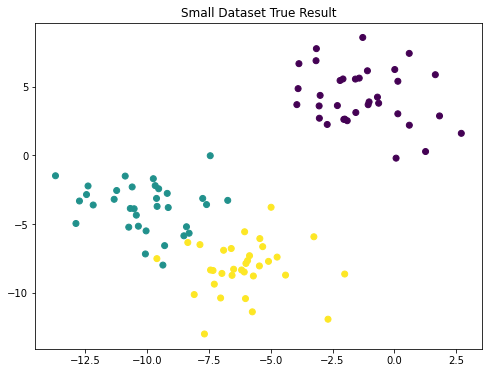

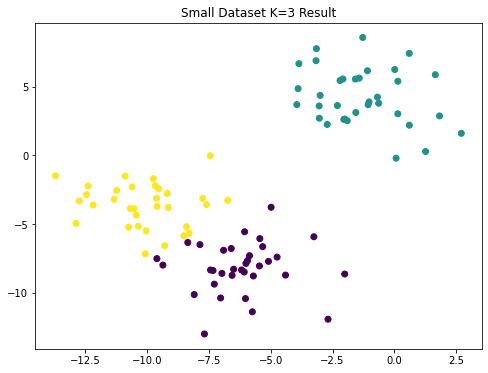

In [7]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(small_df.iloc[:,0],small_df.iloc[:,1],c=small_df.iloc[:,2].astype(float))
plt.title('Small Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(small_df_3.iloc[:,0],small_df_3.iloc[:,1],c=small_df_3.iloc[:,2].astype(float))
plt.title('Small Dataset K=3 Result')

i=0
while i<small_df_3.iloc[:,2].size:
    if(small_df_3.iloc[i,2]==1):
        small_df_3['y'][i]=2
    elif(small_df_3.iloc[i,2]==2):
        small_df_3['y'][i]=1
    i=i+1
    
display(small_df)
display(small_df_3)

In [8]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_small_3=confusion_matrix(small_df['y'], small_df_3['y'], labels=[0,1,2])
print('Confusion Matrix: ')
display(cm_small_3)

# calculate basic measures
recall = np.diag(cm_small_3) / np.sum(cm_small_3, axis = 1)
precision = np.diag(cm_small_3) / np.sum(cm_small_3, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_small_3))/len(small_df.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[ 0,  0, 34],
       [ 1, 32,  0],
       [33,  0,  0]])

recall for each CLUSTER:  [0.         0.96969697 0.        ]
precision for each CLUSTER:  [0. 1. 0.]
overall recall is:  0.32323232323232326
overall precision is:  0.3333333333333333
F-Measures is:  0.3282051282051282
Accuracy is:  0.32


***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Three different K all return the same overall SSE. The greater the K, the smaller the WSS, which means clusters are more concentrated classified.

My preferred clustering is K=4. It has smallest WSS and running time, and the SSE is equal to other K. 

The running time is 0.015625, while others are 0.03125. The WSS is only 516, while K=2 WSS is 1212 and K=3 WSS is 616. 

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [9]:
# I will write them WSS, BSS and SSE as functions for further use
# For large1 Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]
cluster_6=[]
cluster_7=[]

# store the points
i=0
while i<large_df_1.shape[0]:
    if(large_df_1['y'][i]==0):
        cluster_0.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==1):
        cluster_1.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==2):
        cluster_2.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==3):
        cluster_3.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==4):
        cluster_4.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==5):
        cluster_5.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==6):
        cluster_6.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    elif(large_df_1['y'][i]==7):
        cluster_7.append([large_df_1['X0'][i],large_df_1['X1'][i]])
    i=i+1


# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)

temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)

temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

temp_x=0
temp_y=0
i=0
cluster_4_mean=[0,0]
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1

cluster_4_mean[0]=temp_x/len(cluster_4)
cluster_4_mean[1]=temp_y/len(cluster_4)

temp_x=0
temp_y=0
i=0
cluster_5_mean=[0,0]
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1

cluster_5_mean[0]=temp_x/len(cluster_5)
cluster_5_mean[1]=temp_y/len(cluster_5)

temp_x=0
temp_y=0
i=0
cluster_6_mean=[0,0]
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1

cluster_6_mean[0]=temp_x/len(cluster_6)
cluster_6_mean[1]=temp_y/len(cluster_6)

temp_x=0
temp_y=0
i=0
cluster_7_mean=[0,0]
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1

cluster_7_mean[0]=temp_x/len(cluster_7)
cluster_7_mean[1]=temp_y/len(cluster_7)


# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
i=0
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1
    
i=0
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1
    
i=0
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1
    
i=0
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1

total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1
i=0
while i<len(cluster_4):
    temp_x_square+=(cluster_4[i][0]-cluster_4_mean[0])*(cluster_4[i][0]-cluster_4_mean[0])
    temp_y_square+=(cluster_4[i][1]-cluster_4_mean[1])*(cluster_4[i][1]-cluster_4_mean[1])
    i=i+1
i=0
while i<len(cluster_5):
    temp_x_square+=(cluster_5[i][0]-cluster_5_mean[0])*(cluster_5[i][0]-cluster_5_mean[0])
    temp_y_square+=(cluster_5[i][1]-cluster_5_mean[1])*(cluster_5[i][1]-cluster_5_mean[1])
    i=i+1
i=0
while i<len(cluster_6):
    temp_x_square+=(cluster_6[i][0]-cluster_6_mean[0])*(cluster_6[i][0]-cluster_6_mean[0])
    temp_y_square+=(cluster_6[i][1]-cluster_6_mean[1])*(cluster_6[i][1]-cluster_6_mean[1])
    i=i+1
i=0
while i<len(cluster_7):
    temp_x_square+=(cluster_7[i][0]-cluster_7_mean[0])*(cluster_7[i][0]-cluster_7_mean[0])
    temp_y_square+=(cluster_7[i][1]-cluster_7_mean[1])*(cluster_7[i][1]-cluster_7_mean[1])
    i=i+1

print('TRUE WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_x_square+=len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)+len(cluster_4)*pow(total_mean[0]-cluster_4_mean[0],2)+len(cluster_5)*pow(total_mean[0]-cluster_5_mean[0],2)
temp_x_square+=len(cluster_6)*pow(total_mean[0]-cluster_6_mean[0],2)+len(cluster_7)*pow(total_mean[0]-cluster_7_mean[0],2)

temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
temp_y_square+=len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)+len(cluster_4)*pow(total_mean[1]-cluster_4_mean[1],2)+len(cluster_5)*pow(total_mean[1]-cluster_5_mean[1],2)
temp_y_square+=len(cluster_6)*pow(total_mean[1]-cluster_6_mean[1],2)+len(cluster_7)*pow(total_mean[1]-cluster_7_mean[1],2)
print('TRUE BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('TRUE SSE: ',SSE)

TRUE WSS:  3972.315387929946
TRUE BSS:  67712.28953700385
TRUE SSE:  71684.6049249338


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

KMeans(n_clusters=6/8/10, n_init=15)

n_cluster: The number of clusters to form as well as the number of centroids to generate. I choose 6/8/10 as the problem requirement. 

n_initial: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I choose 15 to make sure optimal result can be got.

random_state=0: Making labels unchanged for each run.

In [10]:
X_6=large_df_1.iloc[:,0:2]
start=process_time()
k_means_6 = KMeans(n_clusters=6, n_init=15,random_state=0).fit(X_6)
stop=process_time()
temp_df=pd.DataFrame(k_means_6.labels_,columns=['y'])
temp_df['X1']=X_6.iloc[:,1]
large1_df_6=pd.merge(X_6, temp_df, on=['X1'])
display(large1_df_6)


cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]

# store the points
i=0
while i<large1_df_6.shape[0]:
    if(large1_df_6['y'][i]==0):
        cluster_0.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    elif(large1_df_6['y'][i]==1):
        cluster_1.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    elif(large1_df_6['y'][i]==2):
        cluster_2.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    elif(large1_df_6['y'][i]==3):
        cluster_3.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    elif(large1_df_6['y'][i]==4):
        cluster_4.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    elif(large1_df_6['y'][i]==5):
        cluster_5.append([large1_df_6['X0'][i],large1_df_6['X1'][i]])
    i=i+1


# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)

temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)

temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

temp_x=0
temp_y=0
i=0
cluster_4_mean=[0,0]
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1

cluster_4_mean[0]=temp_x/len(cluster_4)
cluster_4_mean[1]=temp_y/len(cluster_4)

temp_x=0
temp_y=0
i=0
cluster_5_mean=[0,0]
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1

cluster_5_mean[0]=temp_x/len(cluster_5)
cluster_5_mean[1]=temp_y/len(cluster_5)


# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
i=0
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1
    
i=0
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1
    

total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1
i=0
while i<len(cluster_4):
    temp_x_square+=(cluster_4[i][0]-cluster_4_mean[0])*(cluster_4[i][0]-cluster_4_mean[0])
    temp_y_square+=(cluster_4[i][1]-cluster_4_mean[1])*(cluster_4[i][1]-cluster_4_mean[1])
    i=i+1
i=0
while i<len(cluster_5):
    temp_x_square+=(cluster_5[i][0]-cluster_5_mean[0])*(cluster_5[i][0]-cluster_5_mean[0])
    temp_y_square+=(cluster_5[i][1]-cluster_5_mean[1])*(cluster_5[i][1]-cluster_5_mean[1])
    i=i+1


print('WSS K=6: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_x_square+=len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)+len(cluster_4)*pow(total_mean[0]-cluster_4_mean[0],2)+len(cluster_5)*pow(total_mean[0]-cluster_5_mean[0],2)

temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
temp_y_square+=len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)+len(cluster_4)*pow(total_mean[1]-cluster_4_mean[1],2)+len(cluster_5)*pow(total_mean[1]-cluster_5_mean[1],2)

print('BSS K=6: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=6: ',SSE)
print('Running Time K=6: ',stop-start)

,X0,X1,y
0,-10.034530,-3.840980,0
1,-5.190377,-3.198882,0
2,-5.473488,-2.692955,0
3,-4.959855,-3.107043,0
4,-6.688130,8.556784,1
...,...,...,...
1995,-1.306391,1.180059,5
1996,-6.506079,-9.658119,4
1997,-8.333741,-6.394469,4
1998,-4.121770,7.374333,1


WSS K=6:  5606.526295671687
BSS K=6:  66078.07862926209
SSE K=6:  71684.60492493378
Running Time K=6:  0.0888349280000007


In [11]:
X_8=large_df_1.iloc[:,0:2]
start=process_time()
k_means_8 = KMeans(n_clusters=8, n_init=15,random_state=0).fit(X_8)
stop=process_time()
temp_df=pd.DataFrame(k_means_8.labels_,columns=['y'])
temp_df['X1']=X_8.iloc[:,1]
large1_df_8=pd.merge(X_8, temp_df, on=['X1'])
display(large1_df_8)


cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]
cluster_6=[]
cluster_7=[]

# store the points
i=0
while i<large1_df_8.shape[0]:
    if(large1_df_8['y'][i]==0):
        cluster_0.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==1):
        cluster_1.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==2):
        cluster_2.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==3):
        cluster_3.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==4):
        cluster_4.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==5):
        cluster_5.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==6):
        cluster_6.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    elif(large1_df_8['y'][i]==7):
        cluster_7.append([large1_df_8['X0'][i],large1_df_8['X1'][i]])
    i=i+1


# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)

temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)

temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

temp_x=0
temp_y=0
i=0
cluster_4_mean=[0,0]
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1

cluster_4_mean[0]=temp_x/len(cluster_4)
cluster_4_mean[1]=temp_y/len(cluster_4)

temp_x=0
temp_y=0
i=0
cluster_5_mean=[0,0]
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1

cluster_5_mean[0]=temp_x/len(cluster_5)
cluster_5_mean[1]=temp_y/len(cluster_5)

temp_x=0
temp_y=0
i=0
cluster_6_mean=[0,0]
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1

cluster_6_mean[0]=temp_x/len(cluster_6)
cluster_6_mean[1]=temp_y/len(cluster_6)

temp_x=0
temp_y=0
i=0
cluster_7_mean=[0,0]
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1

cluster_7_mean[0]=temp_x/len(cluster_7)
cluster_7_mean[1]=temp_y/len(cluster_7)



# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
i=0
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1
    
i=0
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1
    
i=0
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1
    
i=0
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1
    

total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1
i=0
while i<len(cluster_4):
    temp_x_square+=(cluster_4[i][0]-cluster_4_mean[0])*(cluster_4[i][0]-cluster_4_mean[0])
    temp_y_square+=(cluster_4[i][1]-cluster_4_mean[1])*(cluster_4[i][1]-cluster_4_mean[1])
    i=i+1
i=0
while i<len(cluster_5):
    temp_x_square+=(cluster_5[i][0]-cluster_5_mean[0])*(cluster_5[i][0]-cluster_5_mean[0])
    temp_y_square+=(cluster_5[i][1]-cluster_5_mean[1])*(cluster_5[i][1]-cluster_5_mean[1])
    i=i+1
i=0
while i<len(cluster_6):
    temp_x_square+=(cluster_6[i][0]-cluster_6_mean[0])*(cluster_6[i][0]-cluster_6_mean[0])
    temp_y_square+=(cluster_6[i][1]-cluster_6_mean[1])*(cluster_6[i][1]-cluster_6_mean[1])
    i=i+1
i=0
while i<len(cluster_7):
    temp_x_square+=(cluster_7[i][0]-cluster_7_mean[0])*(cluster_7[i][0]-cluster_7_mean[0])
    temp_y_square+=(cluster_7[i][1]-cluster_7_mean[1])*(cluster_7[i][1]-cluster_7_mean[1])
    i=i+1

print('WSS K=8: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_x_square+=len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)+len(cluster_4)*pow(total_mean[0]-cluster_4_mean[0],2)+len(cluster_5)*pow(total_mean[0]-cluster_5_mean[0],2)
temp_x_square+=len(cluster_6)*pow(total_mean[0]-cluster_6_mean[0],2)+len(cluster_7)*pow(total_mean[0]-cluster_7_mean[0],2)

temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
temp_y_square+=len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)+len(cluster_4)*pow(total_mean[1]-cluster_4_mean[1],2)+len(cluster_5)*pow(total_mean[1]-cluster_5_mean[1],2)
temp_y_square+=len(cluster_6)*pow(total_mean[1]-cluster_6_mean[1],2)+len(cluster_7)*pow(total_mean[1]-cluster_7_mean[1],2)
print('BSS K=8: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square


# calculate SSE
print('SSE K=8: ',SSE)
print('Running Time K=8: ',stop-start)

,X0,X1,y
0,-10.034530,-3.840980,6
1,-5.190377,-3.198882,0
2,-5.473488,-2.692955,0
3,-4.959855,-3.107043,0
4,-6.688130,8.556784,3
...,...,...,...
1995,-1.306391,1.180059,7
1996,-6.506079,-9.658119,4
1997,-8.333741,-6.394469,4
1998,-4.121770,7.374333,3


WSS K=8:  3549.110922208117
BSS K=8:  68135.49400272567
SSE K=8:  71684.60492493378
Running Time K=8:  0.13645229200000042


In [12]:
X_10=large_df_1.iloc[:,0:2]
start=process_time()
k_means_10 = KMeans(n_clusters=10, n_init=15,random_state=0).fit(X_10)
stop=process_time()
temp_df=pd.DataFrame(k_means_10.labels_,columns=['y'])
temp_df['X1']=X_10.iloc[:,1]
large1_df_10=pd.merge(X_10, temp_df, on=['X1'])
display(large1_df_10)


cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]
cluster_6=[]
cluster_7=[]
cluster_8=[]
cluster_9=[]

# store the points
i=0
while i<large1_df_10.shape[0]:
    if(large1_df_10['y'][i]==0):
        cluster_0.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==1):
        cluster_1.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==2):
        cluster_2.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==3):
        cluster_3.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==4):
        cluster_4.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==5):
        cluster_5.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==6):
        cluster_6.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==7):
        cluster_7.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==8):
        cluster_8.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    elif(large1_df_10['y'][i]==9):
        cluster_9.append([large1_df_10['X0'][i],large1_df_10['X1'][i]])
    i=i+1


# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)

temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)

temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

temp_x=0
temp_y=0
i=0
cluster_4_mean=[0,0]
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1

cluster_4_mean[0]=temp_x/len(cluster_4)
cluster_4_mean[1]=temp_y/len(cluster_4)

temp_x=0
temp_y=0
i=0
cluster_5_mean=[0,0]
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1

cluster_5_mean[0]=temp_x/len(cluster_5)
cluster_5_mean[1]=temp_y/len(cluster_5)

temp_x=0
temp_y=0
i=0
cluster_6_mean=[0,0]
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1

cluster_6_mean[0]=temp_x/len(cluster_6)
cluster_6_mean[1]=temp_y/len(cluster_6)

temp_x=0
temp_y=0
i=0
cluster_7_mean=[0,0]
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1

cluster_7_mean[0]=temp_x/len(cluster_7)
cluster_7_mean[1]=temp_y/len(cluster_7)

temp_x=0
temp_y=0
i=0
cluster_8_mean=[0,0]
while i<len(cluster_8):
    temp_x+=cluster_8[i][0]
    temp_y+=cluster_8[i][1]
    i=i+1

cluster_8_mean[0]=temp_x/len(cluster_8)
cluster_8_mean[1]=temp_y/len(cluster_8)

temp_x=0
temp_y=0
i=0
cluster_9_mean=[0,0]
while i<len(cluster_9):
    temp_x+=cluster_9[i][0]
    temp_y+=cluster_9[i][1]
    i=i+1

cluster_9_mean[0]=temp_x/len(cluster_9)
cluster_9_mean[1]=temp_y/len(cluster_9)



# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
i=0
while i<len(cluster_4):
    temp_x+=cluster_4[i][0]
    temp_y+=cluster_4[i][1]
    i=i+1
    
i=0
while i<len(cluster_5):
    temp_x+=cluster_5[i][0]
    temp_y+=cluster_5[i][1]
    i=i+1
    
i=0
while i<len(cluster_6):
    temp_x+=cluster_6[i][0]
    temp_y+=cluster_6[i][1]
    i=i+1
    
i=0
while i<len(cluster_7):
    temp_x+=cluster_7[i][0]
    temp_y+=cluster_7[i][1]
    i=i+1
    
i=0
while i<len(cluster_8):
    temp_x+=cluster_8[i][0]
    temp_y+=cluster_8[i][1]
    i=i+1
    
i=0
while i<len(cluster_9):
    temp_x+=cluster_9[i][0]
    temp_y+=cluster_9[i][1]
    i=i+1
    

total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7)+len(cluster_8)+len(cluster_9))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4)+len(cluster_5)+len(cluster_6)+len(cluster_7)+len(cluster_8)+len(cluster_9))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1
i=0
while i<len(cluster_4):
    temp_x_square+=(cluster_4[i][0]-cluster_4_mean[0])*(cluster_4[i][0]-cluster_4_mean[0])
    temp_y_square+=(cluster_4[i][1]-cluster_4_mean[1])*(cluster_4[i][1]-cluster_4_mean[1])
    i=i+1
i=0
while i<len(cluster_5):
    temp_x_square+=(cluster_5[i][0]-cluster_5_mean[0])*(cluster_5[i][0]-cluster_5_mean[0])
    temp_y_square+=(cluster_5[i][1]-cluster_5_mean[1])*(cluster_5[i][1]-cluster_5_mean[1])
    i=i+1
i=0
while i<len(cluster_6):
    temp_x_square+=(cluster_6[i][0]-cluster_6_mean[0])*(cluster_6[i][0]-cluster_6_mean[0])
    temp_y_square+=(cluster_6[i][1]-cluster_6_mean[1])*(cluster_6[i][1]-cluster_6_mean[1])
    i=i+1
i=0
while i<len(cluster_7):
    temp_x_square+=(cluster_7[i][0]-cluster_7_mean[0])*(cluster_7[i][0]-cluster_7_mean[0])
    temp_y_square+=(cluster_7[i][1]-cluster_7_mean[1])*(cluster_7[i][1]-cluster_7_mean[1])
    i=i+1
i=0
while i<len(cluster_8):
    temp_x_square+=(cluster_8[i][0]-cluster_8_mean[0])*(cluster_8[i][0]-cluster_8_mean[0])
    temp_y_square+=(cluster_8[i][1]-cluster_8_mean[1])*(cluster_8[i][1]-cluster_8_mean[1])
    i=i+1
i=0
while i<len(cluster_9):
    temp_x_square+=(cluster_9[i][0]-cluster_9_mean[0])*(cluster_9[i][0]-cluster_9_mean[0])
    temp_y_square+=(cluster_9[i][1]-cluster_9_mean[1])*(cluster_9[i][1]-cluster_9_mean[1])
    i=i+1

print('WSS K=10: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_x_square+=len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)+len(cluster_4)*pow(total_mean[0]-cluster_4_mean[0],2)+len(cluster_5)*pow(total_mean[0]-cluster_5_mean[0],2)
temp_x_square+=len(cluster_6)*pow(total_mean[0]-cluster_6_mean[0],2)+len(cluster_7)*pow(total_mean[0]-cluster_7_mean[0],2)
temp_x_square+=len(cluster_8)*pow(total_mean[0]-cluster_8_mean[0],2)+len(cluster_9)*pow(total_mean[0]-cluster_9_mean[0],2)

temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
temp_y_square+=len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)+len(cluster_4)*pow(total_mean[1]-cluster_4_mean[1],2)+len(cluster_5)*pow(total_mean[1]-cluster_5_mean[1],2)
temp_y_square+=len(cluster_6)*pow(total_mean[1]-cluster_6_mean[1],2)+len(cluster_7)*pow(total_mean[1]-cluster_7_mean[1],2)
temp_y_square+=len(cluster_8)*pow(total_mean[1]-cluster_8_mean[1],2)+len(cluster_9)*pow(total_mean[1]-cluster_9_mean[1],2)
print('BSS K=10: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square


# calculate SSE
print('SSE K=10: ',SSE)
print('Running Time K=10: ',stop-start)

,X0,X1,y
0,-10.034530,-3.840980,6
1,-5.190377,-3.198882,4
2,-5.473488,-2.692955,4
3,-4.959855,-3.107043,4
4,-6.688130,8.556784,5
...,...,...,...
1995,-1.306391,1.180059,2
1996,-6.506079,-9.658119,8
1997,-8.333741,-6.394469,0
1998,-4.121770,7.374333,9


WSS K=10:  3178.6205876418753
BSS K=10:  68505.98433729191
SSE K=10:  71684.60492493378
Running Time K=10:  0.5739947459999986


***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A va

,X0,X1,y
0,-10.034530,-3.840980,1
1,-5.190377,-3.198882,3
2,-5.473488,-2.692955,3
3,-4.959855,-3.107043,3
4,-6.688130,8.556784,6
...,...,...,...
1995,-1.306391,1.180059,4
1996,-6.506079,-9.658119,2
1997,-8.333741,-6.394469,2
1998,-4.121770,7.374333,6


,X0,X1,y
0,-10.034530,-3.840980,1
1,-5.190377,-3.198882,3
2,-5.473488,-2.692955,3
3,-4.959855,-3.107043,3
4,-6.688130,8.556784,7
...,...,...,...
1995,-1.306391,1.180059,4
1996,-6.506079,-9.658119,2
1997,-8.333741,-6.394469,2
1998,-4.121770,7.374333,7


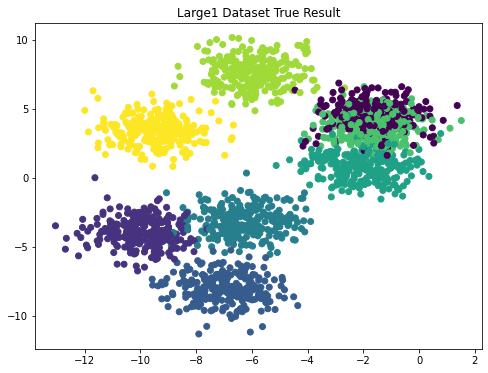

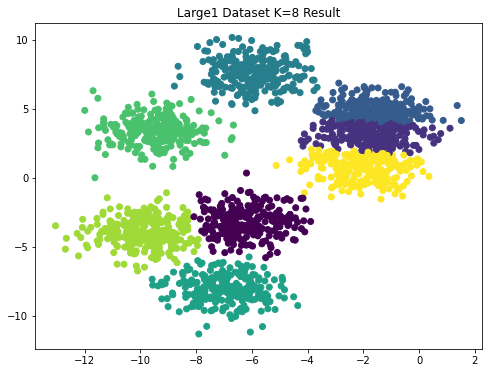

In [13]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_1.iloc[:,0],large_df_1.iloc[:,1],c=large_df_1.iloc[:,2].astype(float))
plt.title('Large1 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large1_df_8.iloc[:,0],large1_df_8.iloc[:,1],c=large1_df_8.iloc[:,2].astype(float))
plt.title('Large1 Dataset K=8 Result')

i=0
while i<large1_df_8.iloc[:,2].size:
    if(large1_df_8.iloc[i,2]==0):
        large1_df_8['y'][i]=3
    elif(large1_df_8.iloc[i,2]==2):
        large1_df_8['y'][i]=6
    elif(large1_df_8.iloc[i,2]==4):
        large1_df_8['y'][i]=2
    elif(large1_df_8.iloc[i,2]==5):
        large1_df_8['y'][i]=0
    elif(large1_df_8.iloc[i,2]==6):
        large1_df_8['y'][i]=1
    elif(large1_df_8.iloc[i,2]==7):
        large1_df_8['y'][i]=4
    elif(large1_df_8.iloc[i,2]==1):
        large1_df_8['y'][i]=5
    elif(large1_df_8.iloc[i,2]==3):
        large1_df_8['y'][i]=7
    i=i+1
    
display(large_df_1)
display(large1_df_8)

In [14]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large1_8=confusion_matrix(large_df_1['y'], large1_df_8['y'], labels=[0,1,2,3,4,5,6,7])
print('Confusion Matrix: ')
display(cm_large1_8)

# calculate basic measures
recall = np.diag(cm_large1_8) / np.sum(cm_large1_8, axis = 1)
precision = np.diag(cm_large1_8) / np.sum(cm_large1_8, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large1_8))/len(large_df_1.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[  0,   0,   0,   0,   1,  83, 165,   1],
       [  1, 247,   0,   2,   0,   0,   0,   0],
       [  0,   1, 246,   3,   0,   0,   0,   0],
       [  0,  12,   0, 237,   1,   0,   0,   0],
       [  0,   0,   0,   0, 229,  20,   1,   0],
       [  0,   0,   0,   0,   6, 155,  89,   0],
       [  0,   0,   0,   0,   0,   0,   1, 249],
       [249,   0,   0,   0,   0,   0,   0,   1]])

recall for each CLUSTER:  [0.    0.988 0.984 0.948 0.916 0.62  0.004 0.004]
precision for each CLUSTER:  [0.         0.95       1.         0.97933884 0.96624473 0.60077519
 0.00390625 0.00398406]
overall recall is:  0.558
overall precision is:  0.563031134532134
F-Measures is:  0.5605042775195557
Accuracy is:  0.558


***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Three different K all return the same overall SSE. The greater the K, the smaller the WSS, which means clusters are more concentrated classified.

My preferred clustering is K=10. Though the running time a a bit longer than others, it has smallest WSS and running time, and the SSE is equal to other K. According to the plot, the K=8 clustering cannot deal with the overlaid area on the top right, so we need a larger K.

Due to the overlaid area on the top right, K=8 only has a 0.815 accuracy, and the recall/precision and f1 are not perfect too. K=6 will have even worse performance than K=8 theoretically. 

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [15]:
# I will write them WSS, BSS and SSE as functions for further use
# For large2 Dataset

cluster_0=[]
cluster_1=[]

# store the points
i=0
while i<large_df_2.shape[0]:
    if(large_df_2['y'][i]==0):
        cluster_0.append([large_df_2['X0'][i],large_df_2['X1'][i]])
    elif(large_df_2['y'][i]==1):
        cluster_1.append([large_df_2['X0'][i],large_df_2['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)



# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1


print('TRUE WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)
print('TRUE BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('TRUE SSE: ',SSE)

TRUE WSS:  1277.6161624690667
TRUE BSS:  801.5364401177087
TRUE SSE:  2079.152602586775


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

KMeans(n_clusters=2/3/4, n_init=15)

n_cluster: The number of clusters to form as well as the number of centroids to generate. I choose 2/3/4 as the problem requirement. 

n_initial: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I choose 15 to make sure optimal result can be got.

random_state=0: Making labels unchanged for each run.

In [16]:
X_2=large_df_2.iloc[:,0:2]
start=process_time()
k_means_2 = KMeans(n_clusters=2, n_init=15,random_state=0).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(k_means_2.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
large2_df_2=pd.merge(X_2, temp_df, on=['X1'])
display(large2_df_2)

# calculate WSS, BSS and SSE
cluster_0=[]
cluster_1=[]

# store the points
i=0
while i<large2_df_2.shape[0]:
    if(large2_df_2['y'][i]==0):
        cluster_0.append([large2_df_2['X0'][i],large2_df_2['X1'][i]])
    elif(large2_df_2['y'][i]==1):
        cluster_1.append([large2_df_2['X0'][i],large2_df_2['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1


print('WSS K=2: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square


temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)
print('BSS K=2: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=2: ',SSE)
print('Running Time K=2: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,0
3,0.520773,-0.367300,1
4,0.213426,-0.049130,0
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,0
1997,2.387512,0.084661,1
1998,1.004315,0.735097,1


WSS K=2:  865.0022865346028
BSS K=2:  1214.1503160521702
SSE K=2:  2079.152602586773
Running Time K=2:  0.05630459099999996


In [17]:
X_3=large_df_2.iloc[:,0:2]
start=process_time()
k_means_3 = KMeans(n_clusters=3, n_init=15,random_state=0).fit(X_3)
stop=process_time()
temp_df=pd.DataFrame(k_means_3.labels_,columns=['y'])
temp_df['X1']=X_3.iloc[:,1]
large2_df_3=pd.merge(X_3, temp_df, on=['X1'])
display(large2_df_3)

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<large_df_2.shape[0]:
    if(large2_df_3['y'][i]==0):
        cluster_0.append([large2_df_3['X0'][i],large2_df_3['X1'][i]])
    elif(large2_df_3['y'][i]==1):
        cluster_1.append([large2_df_3['X0'][i],large2_df_3['X1'][i]])
    elif(large2_df_3['y'][i]==2):
        cluster_2.append([large2_df_3['X0'][i],large2_df_3['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS K=3: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS K=3: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=3: ',SSE)
print('Running Time K=3: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,2
3,0.520773,-0.367300,2
4,0.213426,-0.049130,2
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,2
1997,2.387512,0.084661,1
1998,1.004315,0.735097,2


WSS K=3:  590.2797821249485
BSS K=3:  1488.8728204618246
SSE K=3:  2079.1526025867734
Running Time K=3:  0.1253973790000007


In [18]:
X_4=large_df_2.iloc[:,0:2]
start=process_time()
k_means_4 = KMeans(n_clusters=4, n_init=15,random_state=0).fit(X_4)
stop=process_time()
temp_df=pd.DataFrame(k_means_4.labels_,columns=['y'])
temp_df['X1']=X_4.iloc[:,1]
large2_df_4=pd.merge(X_4, temp_df, on=['X1'])
display(large2_df_4)

cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]

# store the points
i=0
while i<large_df_2.shape[0]:
    if(large2_df_4['y'][i]==0):
        cluster_0.append([large2_df_4['X0'][i],large2_df_4['X1'][i]])
    elif(large2_df_4['y'][i]==1):
        cluster_1.append([large2_df_4['X0'][i],large2_df_4['X1'][i]])
    elif(large2_df_4['y'][i]==2):
        cluster_2.append([large2_df_4['X0'][i],large2_df_4['X1'][i]])
    elif(large2_df_4['y'][i]==3):
        cluster_3.append([large2_df_4['X0'][i],large2_df_4['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

temp_x=0
temp_y=0
i=0
cluster_3_mean=[0,0]
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1

cluster_3_mean[0]=temp_x/len(cluster_3)
cluster_3_mean[1]=temp_y/len(cluster_3)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
i=0
while i<len(cluster_3):
    temp_x+=cluster_3[i][0]
    temp_y+=cluster_3[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1
i=0
while i<len(cluster_3):
    temp_x_square+=(cluster_3[i][0]-cluster_3_mean[0])*(cluster_3[i][0]-cluster_3_mean[0])
    temp_y_square+=(cluster_3[i][1]-cluster_3_mean[1])*(cluster_3[i][1]-cluster_3_mean[1])
    i=i+1

print('WSS K=4: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)+len(cluster_3)*pow(total_mean[0]-cluster_3_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)+len(cluster_3)*pow(total_mean[1]-cluster_3_mean[1],2)
print('BSS K=4: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE K=4: ',SSE)
print('Running Time K=4: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,2
1,1.480423,-0.139902,1
2,0.274929,-0.117472,0
3,0.520773,-0.367300,0
4,0.213426,-0.049130,0
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,3
1997,2.387512,0.084661,1
1998,1.004315,0.735097,3


WSS K=4:  392.67087641654894
BSS K=4:  1686.4817261702237
SSE K=4:  2079.1526025867724
Running Time K=4:  0.12327882700000004


***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,1
1998,1.004315,0.735097,0


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,0
3,0.520773,-0.367300,1
4,0.213426,-0.049130,0
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,0
1997,2.387512,0.084661,1
1998,1.004315,0.735097,1


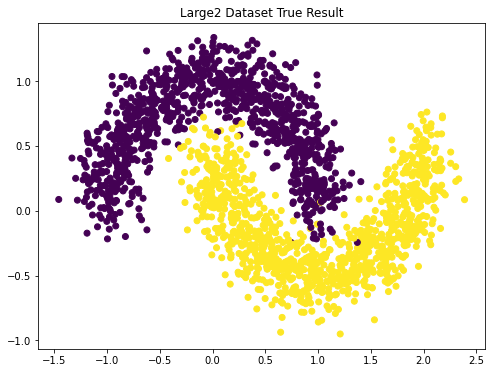

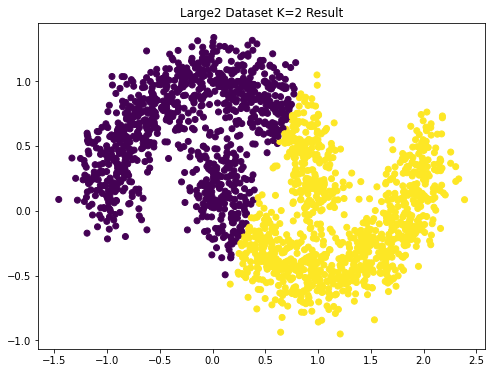

In [19]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_2.iloc[:,0],large_df_2.iloc[:,1],c=large_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_df_2.iloc[:,0],large2_df_2.iloc[:,1],c=large2_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset K=2 Result')
    
display(large_df_2)
display(large2_df_2)

In [ ]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large2_2=confusion_matrix(large_df_2['y'], large2_df_2['y'], labels=[0,1])
print('Confusion Matrix: ')
display(cm_large2_2)

# calculate basic measures
recall = np.diag(cm_large2_2) / np.sum(cm_large2_2, axis = 1)
precision = np.diag(cm_large2_2) / np.sum(cm_large2_2, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large2_2))/len(large_df_2.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[758, 242],
       [234, 766]], dtype=int64)

recall for each CLUSTER:  [0.758 0.766]
precision for each CLUSTER:  [0.7641129  0.75992063]
overall recall is:  0.762
overall precision is:  0.7620167690732207
F-Measures is:  0.7620083844443535
Accuracy is:  0.762


***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Text(0.5, 1.0, 'Large2 Dataset K=4 Result')

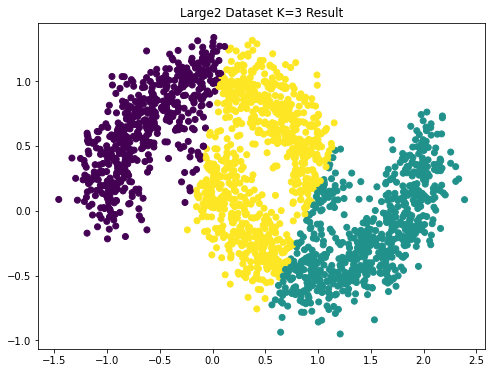

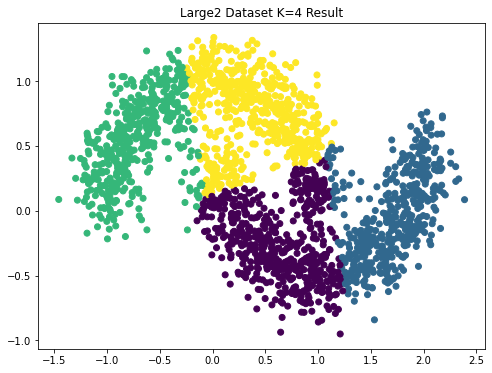

In [20]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large2_df_3.iloc[:,0],large2_df_3.iloc[:,1],c=large2_df_3.iloc[:,2].astype(float))
plt.title('Large2 Dataset K=3 Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_df_4.iloc[:,0],large2_df_4.iloc[:,1],c=large2_df_4.iloc[:,2].astype(float))
plt.title('Large2 Dataset K=4 Result')

Three different K all return the same overall SSE. The greater the K, the smaller the WSS, which means clusters are more concentrated classified.

My preferred clustering is K=2. Though it has larger WSS, and the SSE is equal to other K, it has smallest running time. Als, according to the plot, the K=3 and K=4 cases break the main part of TRUE clustering into pieces.

Due to the entangled area in the center, K=2 only has a 0.762 accuracy, but it still keeps the most part of TRUE clustering.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I will use the DBSCAN algorithm. The algorithm finds core samples of high density and expands clusters from them. It is good for data which contains clusters of similar density, which may solve the problem of entanglement in Large2 Dataset.

In [21]:
from sklearn.cluster import DBSCAN

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

DBSCAN(eps=0.09/0.1,min_samples=10/15)

eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. As the distance between points in Large2 Dataset are small, I choose 0.09/0.1 to make sure all cases are considered. I also want to see if tiny changes to eps will affect the prediction much.

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. I use 10/15 to make sure the cluster is not too small.

In [23]:
start=process_time()
clustering_1 = DBSCAN(eps=0.09, min_samples=10).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(clustering_1.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
large2_DBSCAN_1=pd.merge(X_2, temp_df, on=['X1'])
display(large2_DBSCAN_1)

# I will write them WSS, BSS and SSE as functions for further use
# For Small Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<large2_DBSCAN_1.shape[0]:
    if(large2_DBSCAN_1['y'][i]==0):
        cluster_0.append([large2_DBSCAN_1['X0'][i],large2_DBSCAN_1['X1'][i]])
    elif(large2_DBSCAN_1['y'][i]==1):
        cluster_1.append([large2_DBSCAN_1['X0'][i],large2_DBSCAN_1['X1'][i]])
    elif(large2_DBSCAN_1['y'][i]==-1):
        cluster_2.append([large2_DBSCAN_1['X0'][i],large2_DBSCAN_1['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE: ',SSE)
print('Running Time: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,0


WSS:  1325.4692511744304
BSS:  753.683351412344
SSE:  2079.1526025867743
Running Time:  0.01704677300000057


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,1
1998,1.004315,0.735097,0


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,0


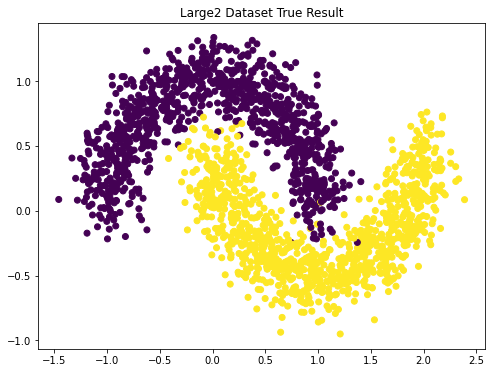

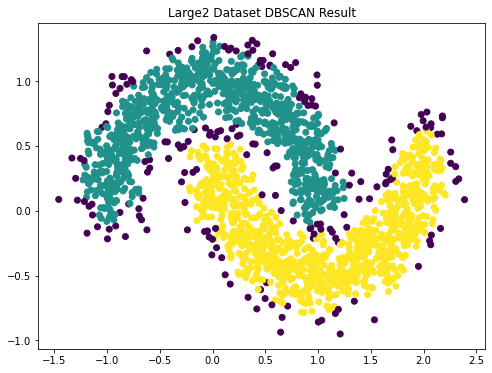

In [24]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_2.iloc[:,0],large_df_2.iloc[:,1],c=large_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_DBSCAN_1.iloc[:,0],large2_DBSCAN_1.iloc[:,1],c=large2_DBSCAN_1.iloc[:,2].astype(float))
plt.title('Large2 Dataset DBSCAN Result')


display(large_df_2)
display(large2_DBSCAN_1)

In [25]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large2_DBSCAN_1=confusion_matrix(large_df_2['y'], large2_DBSCAN_1['y'], labels=[0,1])
print('Confusion Matrix: ')
display(cm_large2_DBSCAN_1)

# calculate basic measures
recall = np.diag(cm_large2_DBSCAN_1) / np.sum(cm_large2_DBSCAN_1, axis = 1)
precision = np.diag(cm_large2_DBSCAN_1) / np.sum(cm_large2_DBSCAN_1, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large2_DBSCAN_1))/len(large_df_2.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[897,   4],
       [  4, 905]])

recall for each CLUSTER:  [0.99556049 0.99559956]
precision for each CLUSTER:  [0.99556049 0.99559956]
overall recall is:  0.9955800241511388
overall precision is:  0.9955800241511388
F-Measures is:  0.9955800241511388
Accuracy is:  0.901


In [26]:
start=process_time()
clustering_2 = DBSCAN(eps=0.1, min_samples=15).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(clustering_2.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
large2_DBSCAN_2=pd.merge(X_2, temp_df, on=['X1'])
display(large2_DBSCAN_2)

# I will write them WSS, BSS and SSE as functions for further use
# For Small Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<large2_DBSCAN_2.shape[0]:
    if(large2_DBSCAN_2['y'][i]==0):
        cluster_0.append([large2_DBSCAN_2['X0'][i],large2_DBSCAN_2['X1'][i]])
    elif(large2_DBSCAN_2['y'][i]==1):
        cluster_1.append([large2_DBSCAN_2['X0'][i],large2_DBSCAN_2['X1'][i]])
    elif(large2_DBSCAN_2['y'][i]==-1):
        cluster_2.append([large2_DBSCAN_2['X0'][i],large2_DBSCAN_2['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE: ',SSE)
print('Running Time: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,0


WSS:  1344.3218604337692
BSS:  734.8307421530044
SSE:  2079.1526025867734
Running Time:  0.013561259000002934


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,1
1998,1.004315,0.735097,0


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,0


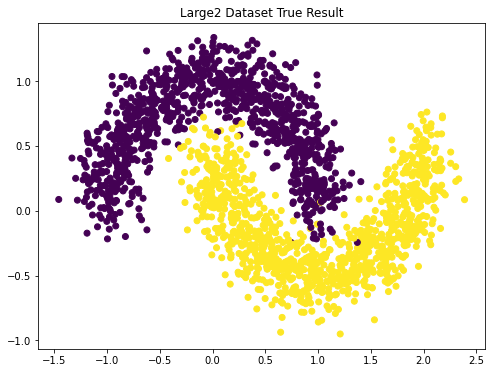

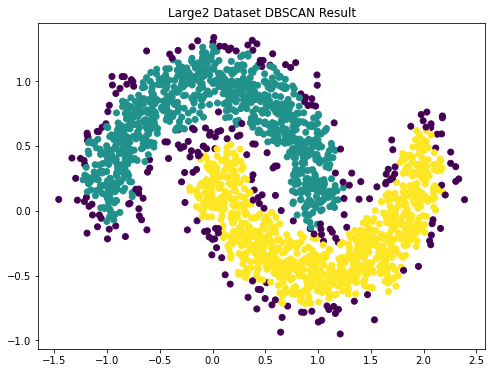

In [27]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_2.iloc[:,0],large_df_2.iloc[:,1],c=large_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_DBSCAN_2.iloc[:,0],large2_DBSCAN_2.iloc[:,1],c=large2_DBSCAN_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset DBSCAN Result')


display(large_df_2)
display(large2_DBSCAN_2)

In [28]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large2_DBSCAN_2=confusion_matrix(large_df_2['y'], large2_DBSCAN_2['y'], labels=[0,1])
print('Confusion Matrix: ')
display(cm_large2_DBSCAN_2)

# calculate basic measures
recall = np.diag(cm_large2_DBSCAN_2) / np.sum(cm_large2_DBSCAN_2, axis = 1)
precision = np.diag(cm_large2_DBSCAN_2) / np.sum(cm_large2_DBSCAN_2, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large2_DBSCAN_2))/len(large_df_2.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[881,   4],
       [  4, 867]])

recall for each CLUSTER:  [0.99548023 0.99540758]
precision for each CLUSTER:  [0.99548023 0.99540758]
overall recall is:  0.9954439017429151
overall precision is:  0.9954439017429151
F-Measures is:  0.9954439017429151
Accuracy is:  0.874


***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

The two experiments change the eps value and min_samples, which are important in constructing DBSCAN. The experiments have same running time.

My preferred clustering is (eps=0.09,min_samples=10),because it have higher accuracy and precision.

The first experiment has 0.901 accuracy and 0.9956 precisio, while the second has 0.874 accuracy and 0.9954 precision.

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I will use the OPTICS algorithm. The algorithm is an extension of DBSCAN which releases the limit of eps in DBSCAN.  Unlike DBSCAN, it keeps cluster hierarchy for a variable neighborhood radius. Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.

In [29]:
from sklearn.cluster import OPTICS

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

OPTICS(min_samples=5/10)


The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. I use 5/15 to make sure the cluster is not too small and compare how two largely different number of samples will affect the result.

max_eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. I will use 0.1 as above to test

In [30]:
start=process_time()
clustering_1 = OPTICS(min_samples=5,max_eps=0.1).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(clustering_1.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
large2_OPTICS_1=pd.merge(X_2, temp_df, on=['X1'])
display(large2_OPTICS_1)

# I will write them WSS, BSS and SSE as functions for further use
# For Small Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<large2_OPTICS_1.shape[0]:
    if(large2_OPTICS_1['y'][i]==0):
        cluster_0.append([large2_OPTICS_1['X0'][i],large2_OPTICS_1['X1'][i]])
    elif(large2_OPTICS_1['y'][i]==1):
        cluster_1.append([large2_OPTICS_1['X0'][i],large2_OPTICS_1['X1'][i]])
    elif(large2_OPTICS_1['y'][i]==-1):
        cluster_2.append([large2_OPTICS_1['X0'][i],large2_OPTICS_1['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE: ',SSE)
print('Running Time: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,-1
1,1.480423,-0.139902,-1
2,0.274929,-0.117472,73
3,0.520773,-0.367300,-1
4,0.213426,-0.049130,92
...,...,...,...
1995,1.792374,-0.195105,88
1996,0.290452,0.336957,-1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,-1


WSS:  1139.654136600671
BSS:  44.86829398836712
SSE:  1184.5224305890383
Running Time:  1.627303028


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,1
1998,1.004315,0.735097,0


,X0,X1,y
0,-0.787816,0.806339,-1
1,1.480423,-0.139902,-1
2,0.274929,-0.117472,73
3,0.520773,-0.367300,-1
4,0.213426,-0.049130,92
...,...,...,...
1995,1.792374,-0.195105,88
1996,0.290452,0.336957,-1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,-1


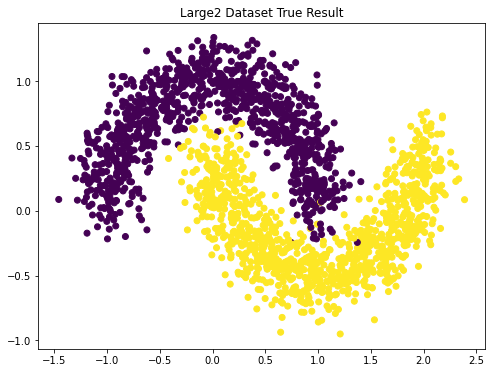

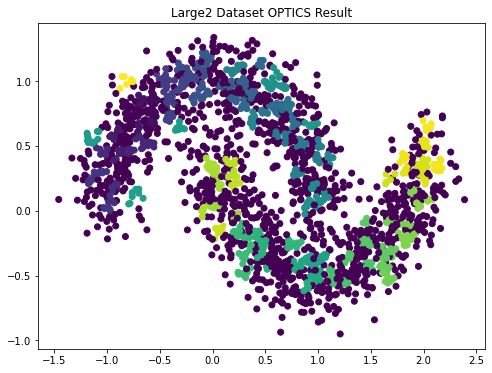

In [31]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_2.iloc[:,0],large_df_2.iloc[:,1],c=large_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_OPTICS_1.iloc[:,0],large2_OPTICS_1.iloc[:,1],c=large2_OPTICS_1.iloc[:,2].astype(float))
plt.title('Large2 Dataset OPTICS Result')


display(large_df_2)
display(large2_OPTICS_1)

In [32]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large2_OPTICS_1=confusion_matrix(large_df_2['y'], large2_OPTICS_1['y'], labels=[0,1])
print('Confusion Matrix: ')
display(cm_large2_OPTICS_1)

# calculate basic measures
recall = np.diag(cm_large2_OPTICS_1) / np.sum(cm_large2_OPTICS_1, axis = 1)
precision = np.diag(cm_large2_OPTICS_1) / np.sum(cm_large2_OPTICS_1, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large2_OPTICS_1))/len(large_df_2.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[18,  6],
       [ 0,  0]])

recall for each CLUSTER:  [0.75  nan]
precision for each CLUSTER:  [1. 0.]
overall recall is:  nan
overall precision is:  0.5
F-Measures is:  nan
Accuracy is:  0.009


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [33]:
start=process_time()
clustering_2 = OPTICS(min_samples=15,max_eps=0.1).fit(X_2)
stop=process_time()
temp_df=pd.DataFrame(clustering_2.labels_,columns=['y'])
temp_df['X1']=X_2.iloc[:,1]
large2_OPTICS_2=pd.merge(X_2, temp_df, on=['X1'])
display(large2_OPTICS_2)

# I will write them WSS, BSS and SSE as functions for further use
# For Small Dataset

cluster_0=[]
cluster_1=[]
cluster_2=[]

# store the points
i=0
while i<large2_OPTICS_2.shape[0]:
    if(large2_OPTICS_2['y'][i]==0):
        cluster_0.append([large2_OPTICS_2['X0'][i],large2_OPTICS_2['X1'][i]])
    elif(large2_OPTICS_2['y'][i]==1):
        cluster_1.append([large2_OPTICS_2['X0'][i],large2_OPTICS_2['X1'][i]])
    elif(large2_OPTICS_2['y'][i]==-1):
        cluster_2.append([large2_OPTICS_2['X0'][i],large2_OPTICS_2['X1'][i]])
    i=i+1

# find mean of each cluster
temp_x=0
temp_y=0
i=0
cluster_0_mean=[0,0]
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1

cluster_0_mean[0]=temp_x/len(cluster_0)
cluster_0_mean[1]=temp_y/len(cluster_0)


temp_x=0
temp_y=0
i=0
cluster_1_mean=[0,0]
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1

cluster_1_mean[0]=temp_x/len(cluster_1)
cluster_1_mean[1]=temp_y/len(cluster_1)


temp_x=0
temp_y=0
i=0
cluster_2_mean=[0,0]
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1

cluster_2_mean[0]=temp_x/len(cluster_2)
cluster_2_mean[1]=temp_y/len(cluster_2)

# calculate the total mean
total_mean=[0,0]
temp_x=0
temp_y=0
i=0
while i<len(cluster_0):
    temp_x+=cluster_0[i][0]
    temp_y+=cluster_0[i][1]
    i=i+1
i=0
while i<len(cluster_1):
    temp_x+=cluster_1[i][0]
    temp_y+=cluster_1[i][1]
    i=i+1
i=0
while i<len(cluster_2):
    temp_x+=cluster_2[i][0]
    temp_y+=cluster_2[i][1]
    i=i+1
    
total_mean[0]=temp_x/(len(cluster_0)+len(cluster_1)+len(cluster_2))
total_mean[1]=temp_y/(len(cluster_0)+len(cluster_1)+len(cluster_2))

# calculate WSS
temp_x_square=0
temp_y_square=0
i=0
while i<len(cluster_0):
    temp_x_square+=(cluster_0[i][0]-cluster_0_mean[0])*(cluster_0[i][0]-cluster_0_mean[0])
    temp_y_square+=(cluster_0[i][1]-cluster_0_mean[1])*(cluster_0[i][1]-cluster_0_mean[1])
    i=i+1
i=0
while i<len(cluster_1):
    temp_x_square+=(cluster_1[i][0]-cluster_1_mean[0])*(cluster_1[i][0]-cluster_1_mean[0])
    temp_y_square+=(cluster_1[i][1]-cluster_1_mean[1])*(cluster_1[i][1]-cluster_1_mean[1])
    i=i+1
i=0
while i<len(cluster_2):
    temp_x_square+=(cluster_2[i][0]-cluster_2_mean[0])*(cluster_2[i][0]-cluster_2_mean[0])
    temp_y_square+=(cluster_2[i][1]-cluster_2_mean[1])*(cluster_2[i][1]-cluster_2_mean[1])
    i=i+1

print('WSS: ',temp_x_square+temp_y_square)
SSE=0
SSE+=temp_x_square+temp_y_square

temp_x_square=0
temp_y_square=0
# calculate BSS
temp_x_square=len(cluster_0)*pow(total_mean[0]-cluster_0_mean[0],2)+len(cluster_1)*pow(total_mean[0]-cluster_1_mean[0],2)+len(cluster_2)*pow(total_mean[0]-cluster_2_mean[0],2)
temp_y_square=len(cluster_0)*pow(total_mean[1]-cluster_0_mean[1],2)+len(cluster_1)*pow(total_mean[1]-cluster_1_mean[1],2)+len(cluster_2)*pow(total_mean[1]-cluster_2_mean[1],2)
print('BSS: ',temp_x_square+temp_y_square)

SSE+=temp_x_square+temp_y_square

# calculate SSE
print('SSE: ',SSE)
print('Running Time: ',stop-start)

,X0,X1,y
0,-0.787816,0.806339,-1
1,1.480423,-0.139902,-1
2,0.274929,-0.117472,-1
3,0.520773,-0.367300,-1
4,0.213426,-0.049130,-1
...,...,...,...
1995,1.792374,-0.195105,-1
1996,0.290452,0.336957,-1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,-1


WSS:  1820.4865662847421
BSS:  53.093538240933945
SSE:  1873.580104525676
Running Time:  1.1574447079999999


,X0,X1,y
0,-0.787816,0.806339,0
1,1.480423,-0.139902,1
2,0.274929,-0.117472,1
3,0.520773,-0.367300,1
4,0.213426,-0.049130,1
...,...,...,...
1995,1.792374,-0.195105,1
1996,0.290452,0.336957,1
1997,2.387512,0.084661,1
1998,1.004315,0.735097,0


,X0,X1,y
0,-0.787816,0.806339,-1
1,1.480423,-0.139902,-1
2,0.274929,-0.117472,-1
3,0.520773,-0.367300,-1
4,0.213426,-0.049130,-1
...,...,...,...
1995,1.792374,-0.195105,-1
1996,0.290452,0.336957,-1
1997,2.387512,0.084661,-1
1998,1.004315,0.735097,-1


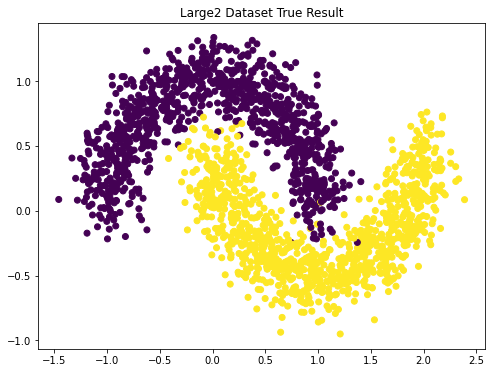

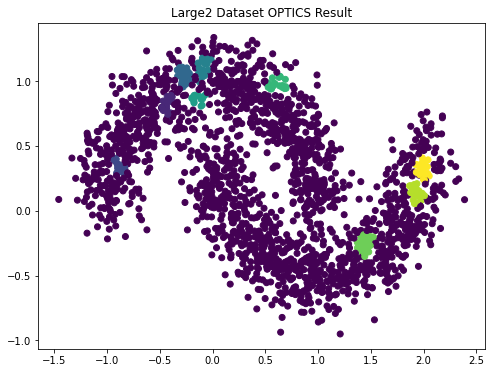

In [34]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(large_df_2.iloc[:,0],large_df_2.iloc[:,1],c=large_df_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset True Result')

plt.figure(figsize=(8,6))
plt.scatter(large2_OPTICS_2.iloc[:,0],large2_OPTICS_2.iloc[:,1],c=large2_OPTICS_2.iloc[:,2].astype(float))
plt.title('Large2 Dataset OPTICS Result')


display(large_df_2)
display(large2_OPTICS_2)

In [35]:
# Construct confusion matrix and basic measures
from sklearn.metrics import confusion_matrix
cm_large2_OPTICS_2=confusion_matrix(large_df_2['y'], large2_OPTICS_2['y'], labels=[0,1])
print('Confusion Matrix: ')
display(cm_large2_OPTICS_2)

# calculate basic measures
recall = np.diag(cm_large2_OPTICS_2) / np.sum(cm_large2_OPTICS_2, axis = 1)
precision = np.diag(cm_large2_OPTICS_2) / np.sum(cm_large2_OPTICS_2, axis = 0)

print('recall for each CLUSTER: ',recall)
print('precision for each CLUSTER: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

f_measure = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure)

accuracy=sum(np.diag(cm_large2_OPTICS_2))/len(large_df_2.iloc[:,0])
print('Accuracy is: ',accuracy)

Confusion Matrix: 


array([[21, 15],
       [ 0,  0]])

recall for each CLUSTER:  [0.58333333        nan]
precision for each CLUSTER:  [1. 0.]
overall recall is:  nan
overall precision is:  0.5
F-Measures is:  nan
Accuracy is:  0.0105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

The OPTICS experiments do not return a satisfying clustering, the accuracy and plot are all not accurate.

My preferred clustering is min_samples=16, as it returns less clusterings and higher accuracy.

The accuracy with second experiment is 0.0265, while the first one is only 0.009

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

The best performance is the DBSCAN clustering algorithm, which has the highest accuracy and precision. The plot it generates is also highly interchangable to the TRUE clustering. It also has the smallest running time which is only 0.015 seconds. 

The worst performance is the OPTICS clustering algorithm. It has largest running time, generates too many clusterings which are invalid. It has worst affinity to TRUE clustering.

From the plot we can see the data from two clusterings are entangled in the center of plot, which may make the K-means and OPTICS hard to identity correct clustering. K-means calculate the distance to identify clustering, and when the distances are close to each other, it will be unable to correctly classify. OPTICS are sensitive to min_samples and eps, making the correct cconfigurations hard to determine.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

I will choose DBSCAN. It has the highest accuracy and precision. The plot it generates is also highly corresponds to the TRUE clustering except for several noise points. It also has the smallest running time which is only 0.015 seconds. 

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I found that Kmeans is suitable for small dataset with simple clusterings, but it performs not well when the clustering are complex. DBSCAN performs well on complicated clusterings, but its extension OPTICS is too sensitive to configuration which are not that applicable. 

***
### END-OF-SUBMISSION
***